### Written by Federica B. Bianco @fedhere
### NYU CUSP PUI
### Assignment 1 Homework 3
###   hx517  

- ### GENERATE  100 samples of different sizes N (N>10 & N<2000) from each of 5 different distributions (500 samples in total), 
### _all with the same population mean_. Include a _Normal_, a _Poisson_, a _Binomial_, a _Chi-Squared_ distribution, and 1 more of your choice.                                       
- ### For each sample plot the sample mean (dependent var.) against the sample size N (independent var.) (if you want you can do it with the sample standard deviation as well). 
- ### Describe the behavior you see in the plots in terms of the law of large numbers.
- ### PLOT the distributions of all sample means (together for all distributions). _Mandatory_: as a histogram. _Optional_: in any other way you think is convincing
### Extra Credit: FIT a gaussian to the distribution of means            

In [2]:
from __future__ import print_function
__author__= 'Hao Xi'

import matplotlib.pylab as pl
import pandas as pd
# this package sets up pretty plots
import seaborn
from scipy.optimize import curve_fit, minimize
from scipy.stats import norm
%matplotlib inline
pl.style.use('bmh')

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


## choose which distributions to use 

In [3]:
#distributions = ['pois', 'gaus', 'chisq', 'cauchy', 'lnorm', 'binomial']
distributions = ['chisq']


## and which mean to give it

In [4]:
mymean = 100

# Let's see what this distribution looks like, what is the PDF, and how are the moments defined. Wikipedia is great for this! 

![1](chisq1.png)

![2](chisq2.png)

# Then lets look at the numpy random sampling package to see how I create the distribution
http://docs.scipy.org/doc/numpy/reference/routines.random.html
http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.chisquare.html#numpy.random.chisquare

![numpy](numpy_chisq.png)


In [5]:
# the chi sq distribution takes the number of degrees of freedom, which luckily is the same as the mean!
df = mymean

## I am making a dictionary to host the distributions.

that is only one possible option. with a dictionary I can easily inspect the distribution I want by its name: it is a very human friendly data storage. In this example I am only using a single distribution, so for me it is overkill, but if I were doing the whole exercise with 5 or 6 distributions it would be useful!

Lets start by looking at a single chi sq distribution

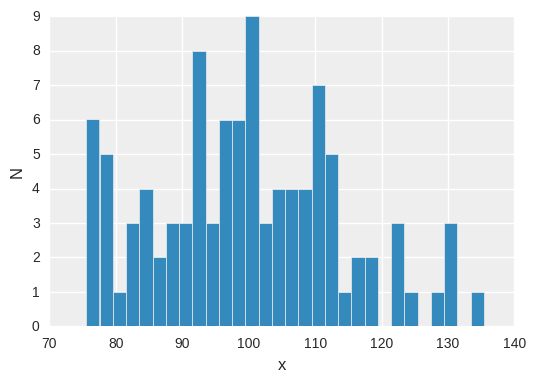

In [6]:
# Note: I am adding imports here, to show the workflow: 
# at this point I realize what packages I need and I import them. 
# but this is a PEP8 violation. 
# It is a good habit to put the includes at the top 
# so the code fails right away if the packages are missing. 
# Otherwise a user may have a piece of code running for a long time, 
# and then fail when the package cannot be imported... 
# (unless they are only imported under conditions, e.g. in an if statement)

import numpy as np

np.random.seed(100)
md = {}
# md is an empty disctionary
md['chisq'] = np.random.chisquare(df, size=100)
# md now is a dictionary with one object: an array by the key 'chisq'
pl.hist(md['chisq'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')

### Figure 1: Chi sq distribution: mean = 100, N=100

## let numpy calculate what the mean and stdev of this distribution are

In [7]:
print ("Chisq mean: %.2f, standard deviation: %.2f"%(md['chisq'].mean(), md['chisq'].std()))

Chisq mean: 99.87, standard deviation: 14.07


## Now let's do it for 1000 Chisq distributions
we want distributions of different sizes (all integers between 10 and 20000)

In [8]:
mysize = (2000 / (np.array(range(1, 1000)))).astype(int)
# mysize = 1000 / (np.array(range(1, 100) + [10]))
# mysize = (np.random.rand(100) * 1000).astype(int)
mysize[:100]

array([2000, 1000,  666,  500,  400,  333,  285,  250,  222,  200,  181,
        166,  153,  142,  133,  125,  117,  111,  105,  100,   95,   90,
         86,   83,   80,   76,   74,   71,   68,   66,   64,   62,   60,
         58,   57,   55,   54,   52,   51,   50,   48,   47,   46,   45,
         44,   43,   42,   41,   40,   40,   39,   38,   37,   37,   36,
         35,   35,   34,   33,   33,   32,   32,   31,   31,   30,   30,
         29,   29,   28,   28,   28,   27,   27,   27,   26,   26,   25,
         25,   25,   25,   24,   24,   24,   23,   23,   23,   22,   22,
         22,   22,   21,   21,   21,   21,   21,   20,   20,   20,   20,
         20])

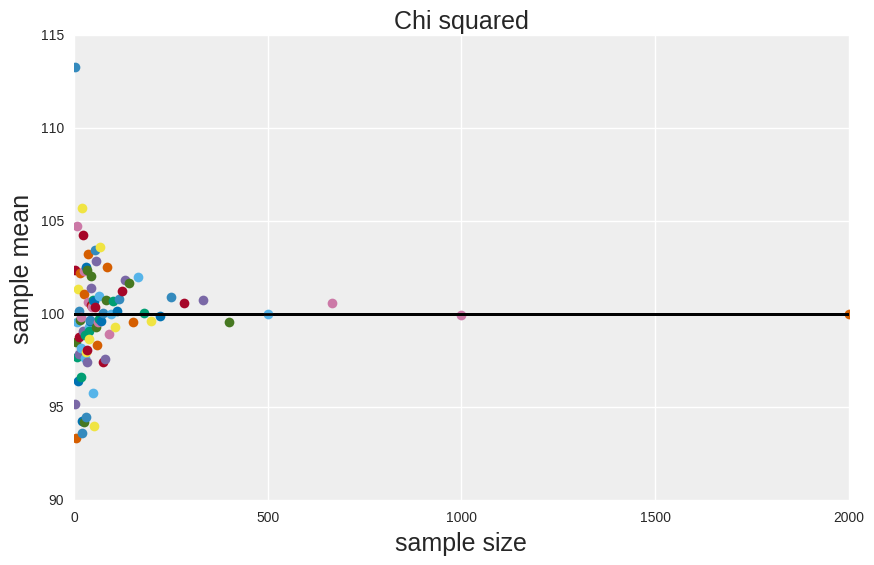

In [9]:
# I am gonna overwrite the disctionary entry created into a nested dictionary 
# the outside dictionary hosts the distributions as dictionary, 
# and each distribution dictionary contains the 100 distribution (arrays of diferent sizes)

md['chisq'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['chisq'][n] = np.random.chisquare(df, size = n)
    
# save the means for plotting later    

md['chisq']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['chisq']:
    if not type(nn) == str:
        md['chisq']['means'][nn] = md['chisq'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md['chisq']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Chi squared', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

### Figure 2:Chi squared - The larger the sample size is, the closer the sample mean is to mymean

# now the histogram of the mean of all samples: 
## this requires some data wrangling, since i put the data in a dictionary which is a user friendly data structure, but perhaps not the most machine friendly one

a coder friendly, though not terribly pythonic way to do it is to append each mean in a list in a for loop, and then hist that. be careful: if your data size gets large this becomes a very bad idea!!

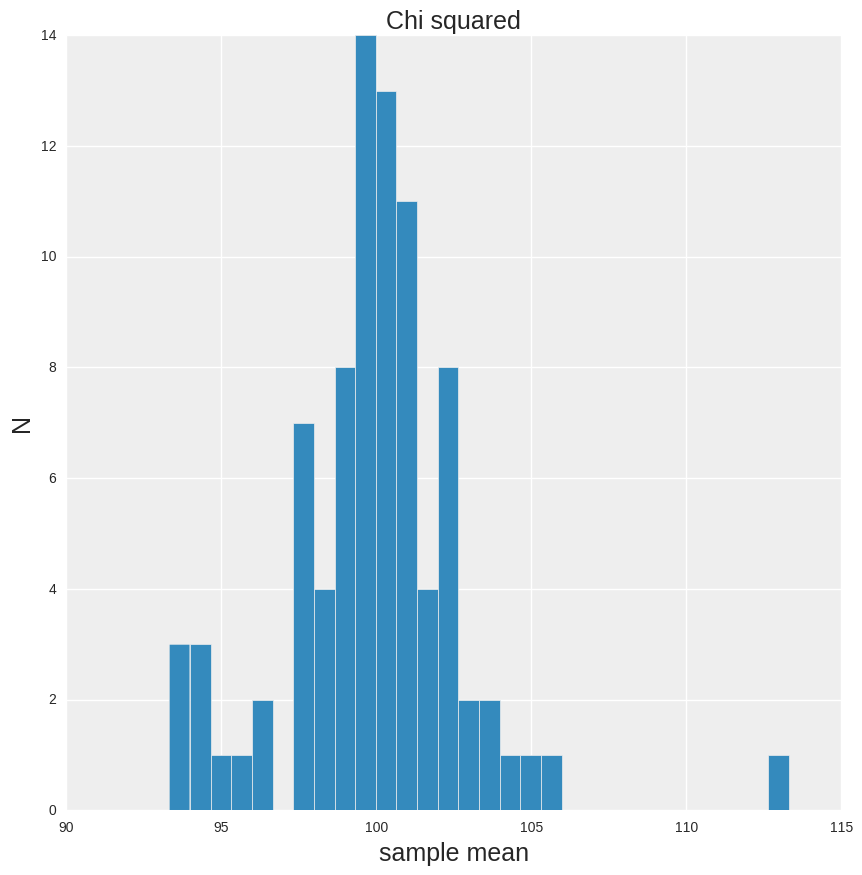

In [10]:
allmeans1 = list(md['chisq']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans1,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.title('Chi squared', fontsize = 18)

## Figure 3: Chi squared - The larger the N is, the closer to 100 the sample mean is

# Do it for the Normal distribution


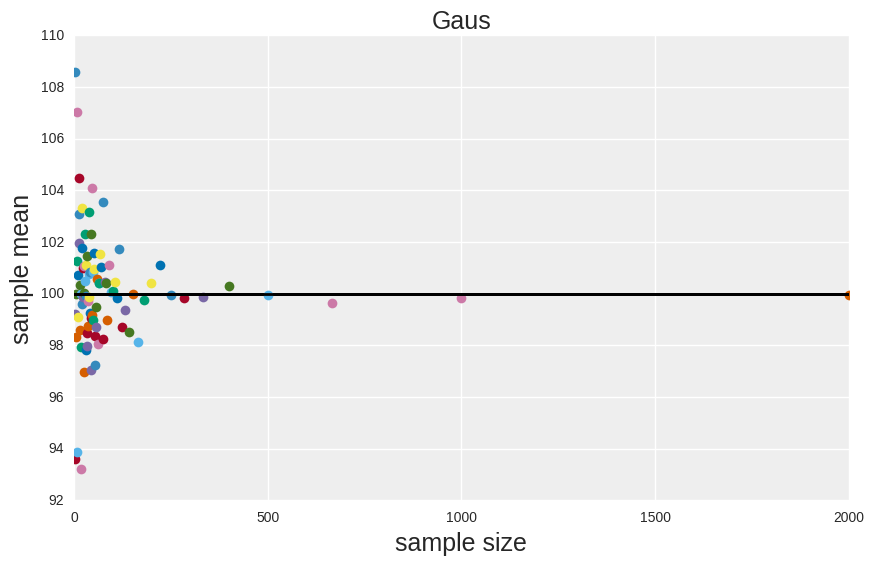

In [11]:
##your code here..
md['Gaus'] = {} 

mean = mymean
std = 10

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['Gaus'][n] = np.random.normal(mean,std,n)
    
# save the means for plotting later    

md['Gaus']['means'] = {}
axgaus_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['Gaus']:
    if not type(nn) == str:
        md['Gaus']['means'][nn] = md['Gaus'][nn].mean()
        #and plot it
        axgaus_mu_n.plot(nn, md['Gaus']['means'][nn], 'o')
        axgaus_mu_n.set_xlabel('sample size', fontsize=18)
        axgaus_mu_n.set_ylabel('sample mean', fontsize=18)
        axgaus_mu_n.set_title('Gaus', fontsize=18)
        axgaus_mu_n.plot([min(mysize), max(mysize)], [mean, mean], 'k')

## Figure 4: Normal - The larger the sample size is, the closer to 100 the sample mean is

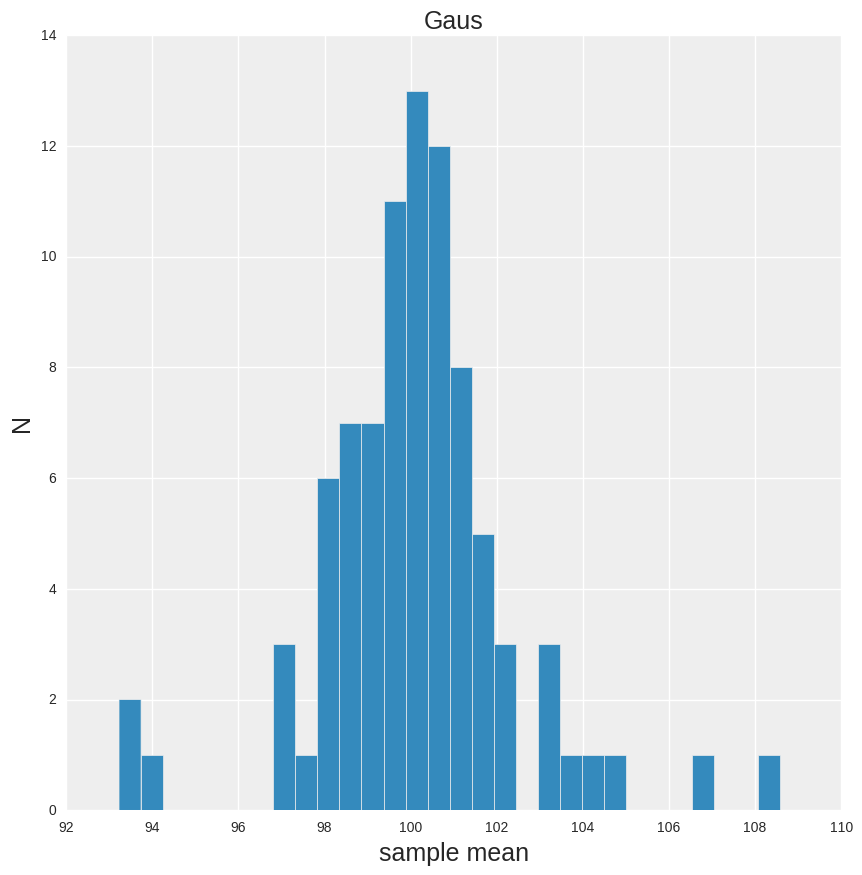

In [12]:
allmeans2 = list(md['Gaus']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans2,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.title('Gaus', fontsize = 18)

## Figure 5: Normal - The larger the sample size is, the closer to 100 the sample mean is

# Do it for the Poisson distribution

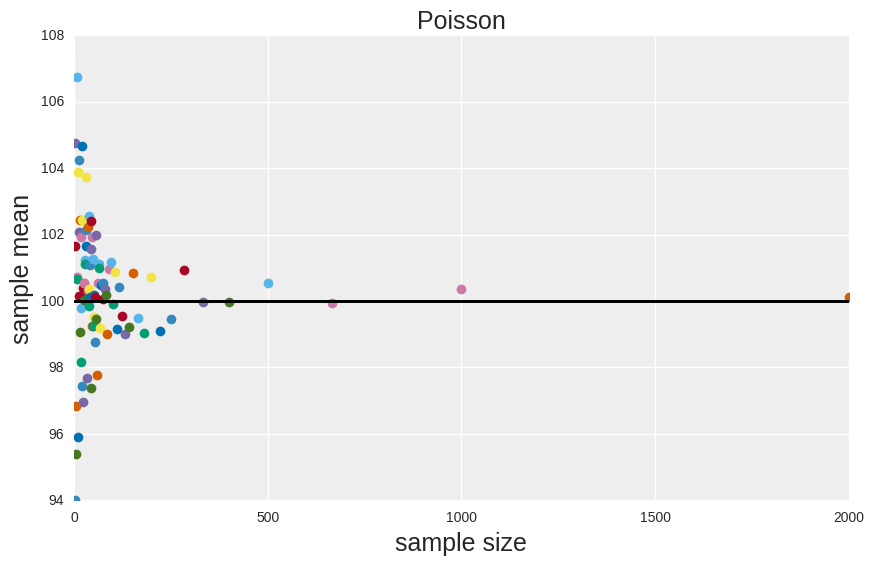

In [13]:
##your code here...
md['Poisson'] = {} 

lam = mymean

for n in mysize:
    md['Poisson'][n] = np.random.poisson(lam,n)
    
# save the means for plotting later    

md['Poisson']['means'] = {}
axpoisson_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['Poisson']:
    if not type(nn) == str:
        md['Poisson']['means'][nn] = md['Poisson'][nn].mean()
        #and plot it
        axpoisson_mu_n.plot(nn, md['Poisson']['means'][nn], 'o')
        axpoisson_mu_n.set_xlabel('sample size', fontsize=18)
        axpoisson_mu_n.set_ylabel('sample mean', fontsize=18)
        axpoisson_mu_n.set_title('Poisson', fontsize=18)
        axpoisson_mu_n.plot([min(mysize), max(mysize)], [mean, mean], 'k')

## Figure 6: Poisson - The larger the sample size is, the closer  to 100 the sample mean is

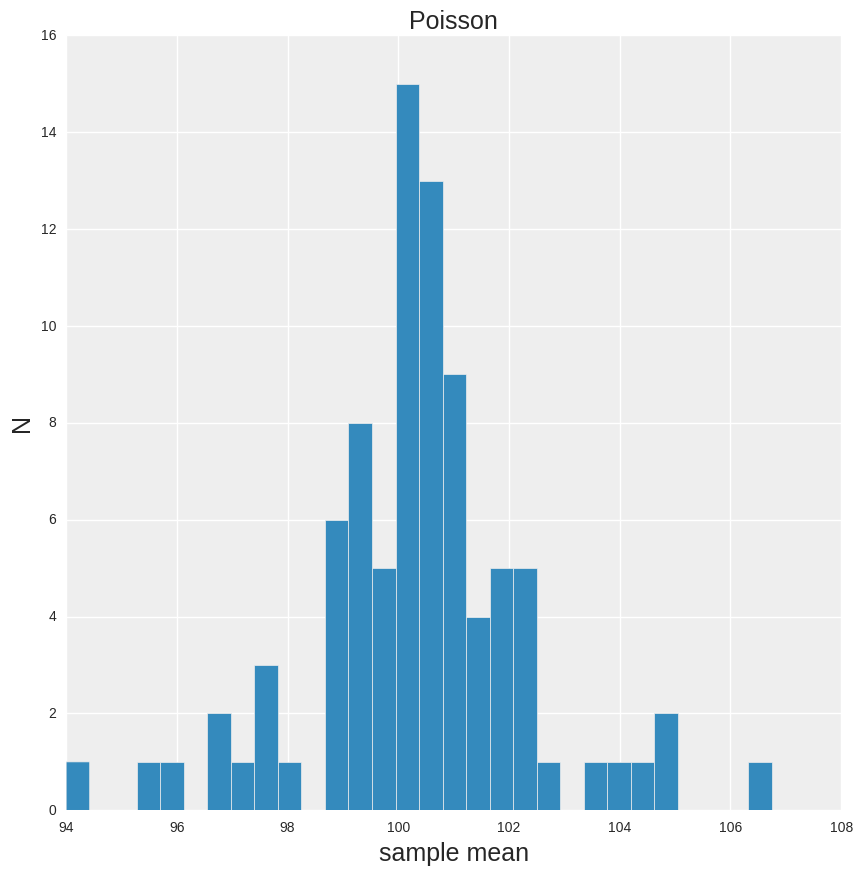

In [14]:
allmeans3 = list(md['Poisson']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans3,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.title('Poisson', fontsize = 18)

## Figure 7: Poisson - The larger the sample size is, the closer to 100the sample mean is

# Do it for the Binomial distribution

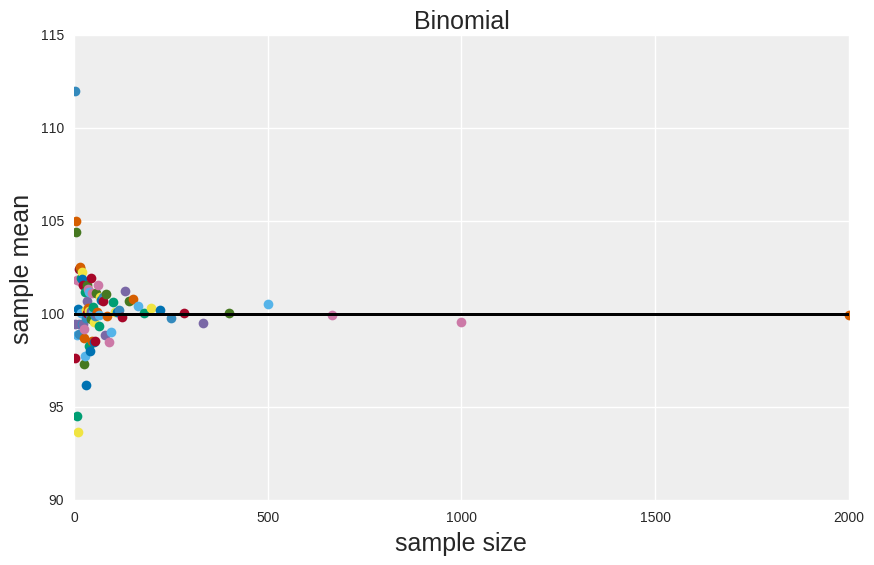

In [15]:
##your code here...
md['Binomial'] = {} 


p_b = 0.4
ntrial = mymean/p_b
#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['Binomial'][n] = np.random.binomial(ntrial,p_b,size=n)
    
# save the means for plotting later    

md['Binomial']['means'] = {}
axbinomial_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['Binomial']:
    if not type(nn) == str:
        md['Binomial']['means'][nn] = md['Binomial'][nn].mean()
        #and plot it
        axbinomial_mu_n.plot(nn, md['Binomial']['means'][nn], 'o')
        axbinomial_mu_n.set_xlabel('sample size', fontsize=18)
        axbinomial_mu_n.set_ylabel('sample mean', fontsize=18)
        axbinomial_mu_n.set_title('Binomial', fontsize=18)
        axbinomial_mu_n.plot([min(mysize), max(mysize)], [mymean, mymean], 'k')

## Figure 8: Binomial - The larger the sample size is, the closer to 100 the sample  mean is

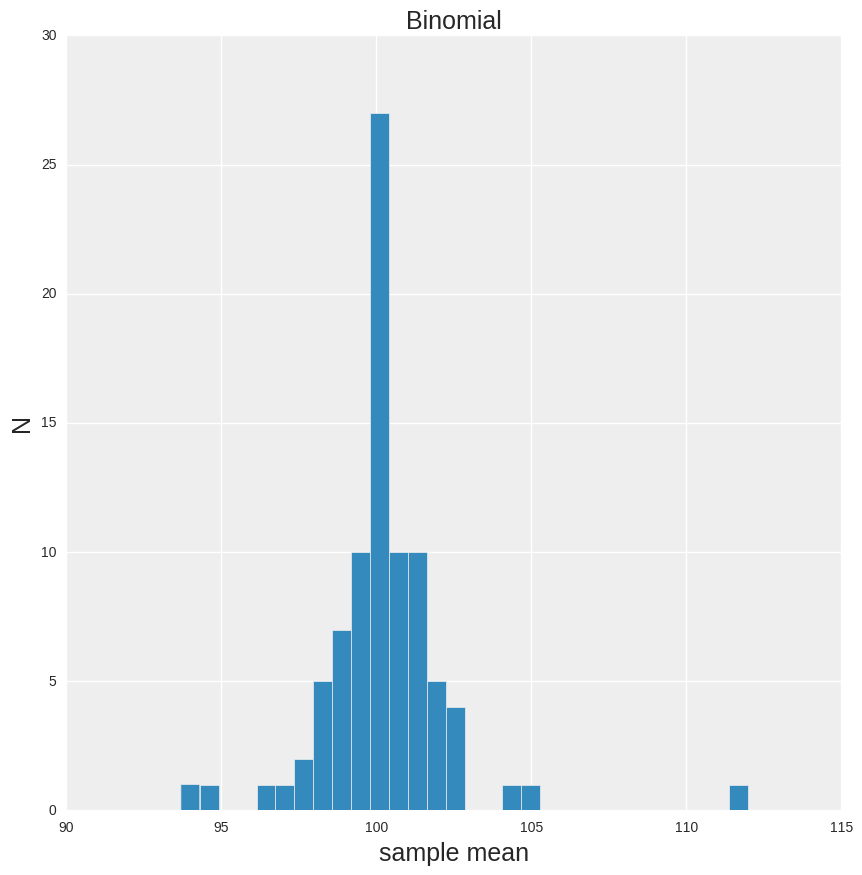

In [16]:
allmeans4 = list(md['Binomial']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans4,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.title('Binomial', fontsize = 18)

## Figure 9: Binomial - The larger the sample size is, the closer the sample mean is to 100

# Do it for another distribution——I choose Geometric

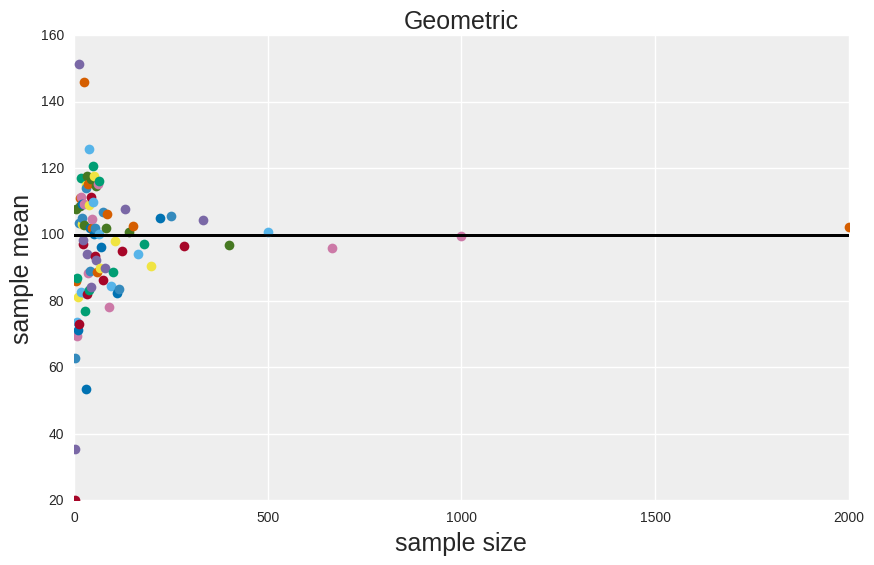

In [17]:
##your code here...
md['Geometric'] = {} 

p = 1./mymean

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['Geometric'][n] = np.random.geometric(p,n)
    
# save the means for plotting later    

md['Geometric']['means'] = {}
axgeometric_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['Geometric']:
    if not type(nn) == str:
        md['Geometric']['means'][nn] = md['Geometric'][nn].mean()
        #and plot it
        axgeometric_mu_n.plot(nn, md['Geometric']['means'][nn], 'o')
        axgeometric_mu_n.set_xlabel('sample size', fontsize=18)
        axgeometric_mu_n.set_ylabel('sample mean', fontsize=18)
        axgeometric_mu_n.set_title('Geometric', fontsize=18)
        axgeometric_mu_n.plot([min(mysize), max(mysize)], [mymean,mymean], 'k')

## Figure 10: Geometric - The larger the sample size is, the closer the sample mean is to 100

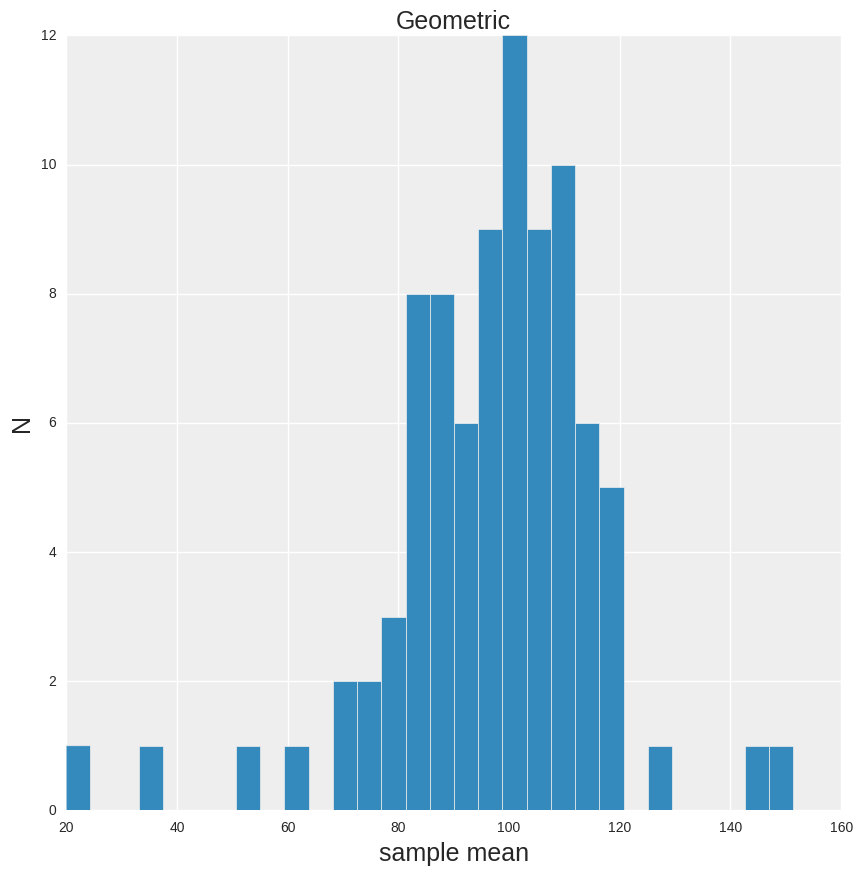

In [18]:
allmeans5 = list(md['Geometric']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans5,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.title('Geometric', fontsize = 18)

## Figure 11: Geometric - The larger the sample size is, the closer to 100 the sample mean is

## Now do the Extra

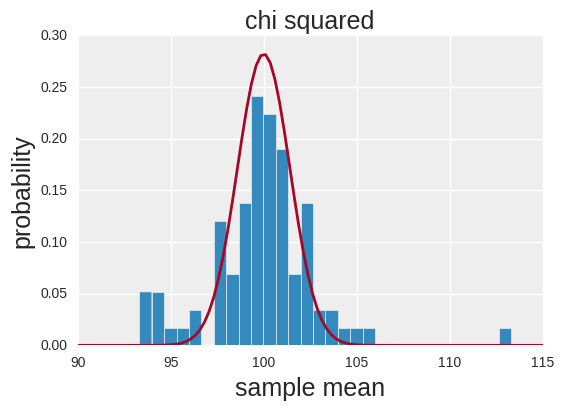

In [19]:
pl.hist(allmeans1,bins=30,normed=True)
min,max = pl.xlim()
x=np.linspace(min,max,100)
y=norm.pdf(x,mymean,np.sqrt(2*df/len(allmeans1)))
pl.plot(x,y,label='fit')
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('probability', fontsize = 18)
pl.title('chi squared', fontsize = 18)
pl.show()

## Figure 12: FIT a gaussian to Chi squared distributions

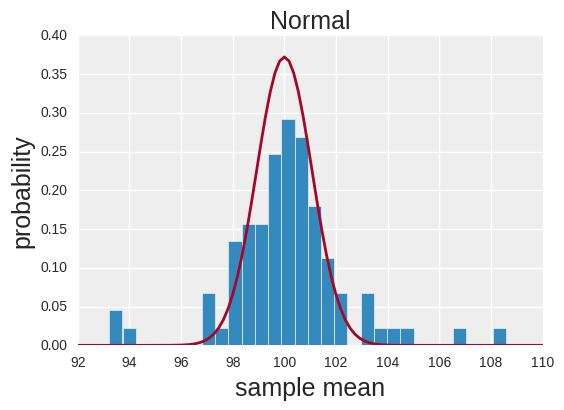

In [20]:
pl.hist(allmeans2,bins=30,normed=True)
min,max = pl.xlim()
x=np.linspace(min,max,100)
y=norm.pdf(x,mymean,std/np.sqrt(len(allmeans2)))
pl.plot(x,y,label='fit')
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('probability', fontsize = 18)
pl.title('Normal', fontsize = 18)
pl.show()

## Figure 13: FIT a gaussian to Normal distributions

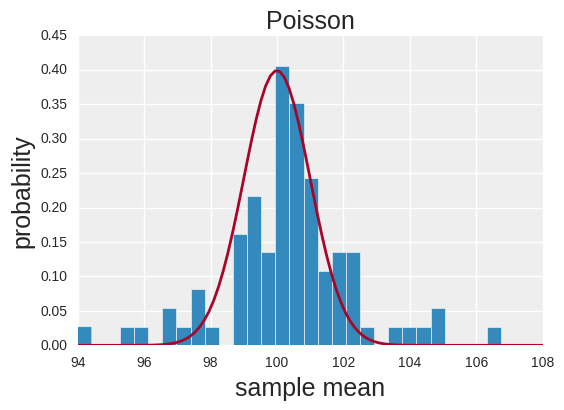

In [21]:
pl.hist(allmeans3,bins=30,normed=True)
min,max = pl.xlim()
x=np.linspace(min,max,100)
y=norm.pdf(x,mymean,np.sqrt(lam/len(allmeans3)))
pl.plot(x,y,label='fit')
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('probability', fontsize = 18)
pl.title('Poisson', fontsize = 18)
pl.show()

## Figure 14: FIT a gaussian to Poisson distributions

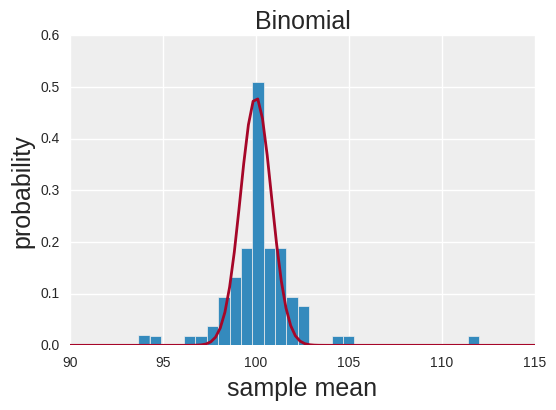

In [25]:
pl.hist(allmeans4,bins=30,normed=True)
min,max = pl.xlim()
x=np.linspace(min,max,100)
y=norm.pdf(x,mymean,np.sqrt(ntrial*p_b*(1-p_b)/len(allmeans4)))
pl.plot(x,y,label='fit')
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('probability', fontsize = 18)
pl.title('Binomial', fontsize = 18)
pl.show()

## Figure 15: FIT a gaussian to Binomial distributions

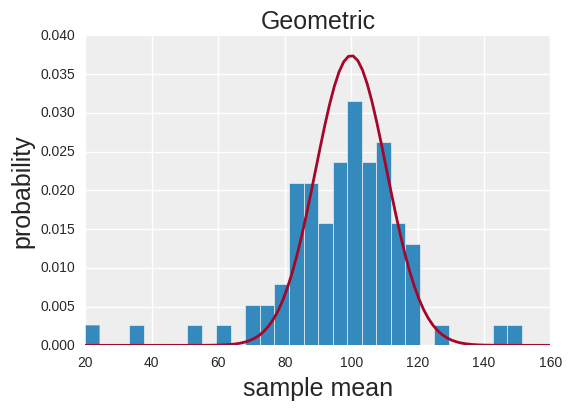

In [23]:
pl.hist(allmeans5,bins=30,normed=True)
min,max = pl.xlim()
x=np.linspace(min,max,100)
y=norm.pdf(x,mymean,np.sqrt(((1-0.01)/0.01**2)/len(allmeans5)))
pl.plot(x,y,label='fit')
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('probability', fontsize = 18)
pl.title('Geometric', fontsize = 18)
pl.show()

## Figure 16: FIT a gaussian to Geometry distributions

pl.hist(allmeans5,bins=30,normed=True)
min,max = pl.xlim()
x=np.linspace(min,max,100)
y=norm.pdf(x,mymean,np.sqrt(((1-p)/p**2)/len(allmeans5)))
pl.plot(x,y,label='fit')
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('probability', fontsize = 18)
pl.title('chi squared', fontsize = 18)
pl.show()

